In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

### Checkpoint

In [3]:
new_review_df.to_csv('dahtah/uncleaned_reviews.csv', index=False)

NameError: name 'new_review_df' is not defined

### Load

In [3]:
reviews_fp = 'dahtah/uncleaned_reviews.csv'
new_review_df = pd.read_csv(reviews_fp)

# Part 1. Data Cleaning on reviews dataset

In [8]:
fp = 'dahtah/australian_user_reviews.json'

In [9]:
fh = open(fp, encoding='utf-8')

In [10]:
rows = []
for i in fh:
    rows += [eval(i)]

In [11]:
reviews_df = pd.DataFrame(rows)

In [12]:
reviews_df.head()

,reviews,user_id,user_url
0,"[{'funny': '', 'posted': 'Posted November 5, 2...",76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,"[{'funny': '', 'posted': 'Posted June 24, 2014...",js41637,http://steamcommunity.com/id/js41637
2,"[{'funny': '', 'posted': 'Posted February 3.',...",evcentric,http://steamcommunity.com/id/evcentric
3,"[{'funny': '', 'posted': 'Posted October 14, 2...",doctr,http://steamcommunity.com/id/doctr
4,"[{'funny': '3 people found this review funny',...",maplemage,http://steamcommunity.com/id/maplemage


In [13]:
fh.close()

In [14]:
def add_user_id(row):
    user_id = row['user_id']
    review_list = row['reviews']
    for dct in review_list:
        dct['user_id'] = user_id
    return review_list

In [15]:
new_review_df = pd.DataFrame(reviews_df.apply(add_user_id, axis = 1).sum())

In [4]:
new_review_df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637


In [17]:
dates = list(new_review_df['posted'].apply(lambda x: x[7:-1]))

In [18]:
years = [int(i.split(',')[1].strip()) for i in dates if ',' in i]

In [19]:
np.max(years)

2015

Steam doesn't show year of the comment posted when it is posted during the current year. Therefore the data is likely collected during 2016, impute those dates with a year

In [20]:
def add_year(date_string):
    if ',' not in date_string:
        return date_string[:-1] + ', 2016' + date_string[-1]
    else:
        return date_string

In [21]:
new_review_df['posted'] = new_review_df['posted'].apply(add_year)

In [22]:
def remove_extra(date_string):
    return date_string.replace('Posted ', '')[:-1]

In [23]:
new_review_df['posted'] = new_review_df['posted'].apply(remove_extra)

In [24]:
new_review_df['posted'] = pd.to_datetime(new_review_df['posted'])

--------------

In [5]:
new_review_df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637


## Finding: Overall recommendation intention
In general user would tend to give a good review when they bother to type up a review. <br>
And yes, Pie chart sometimes IS viable

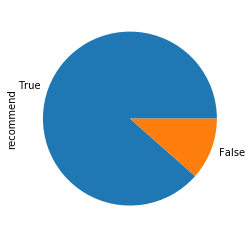

In [6]:
new_review_df['recommend'].value_counts().plot(kind = 'pie')

In [201]:
new_review_df['recommend'].mean()

0.8847989208329821

## Finding: How often are reviews rated by other users?
It turns out in the dataset there are 50% of the time people actually bothered to rate whether or not a review is helpful<br>
(Spoiler) This observation will lead to the decision of predictive task

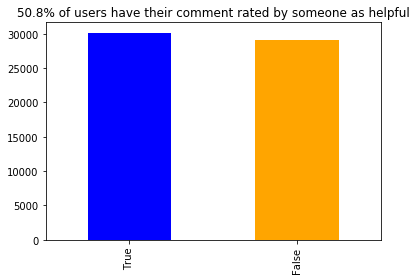

In [7]:
(new_review_df['helpful'] == 'No ratings yet').value_counts().plot(kind = 'bar', color = ['blue', 'orange'], title = str(((new_review_df['helpful'] == 'No ratings yet').mean()//0.001)/10) + '% of users have their comment rated by someone as helpful')

In [148]:
new_review_df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id,user_item
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479,"(76561197970982479, 1250)"
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479,"(76561197970982479, 22200)"
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,"(76561197970982479, 43110)"
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637,"(js41637, 251610)"
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637,"(js41637, 227300)"


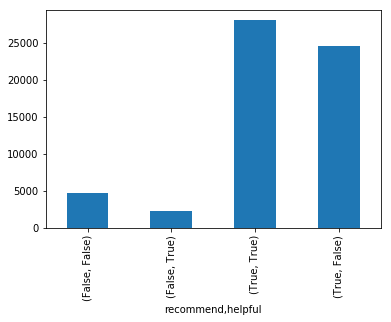

In [167]:
helpful_by_recommend = new_review_df.groupby('recommend')['helpful'].apply(lambda x:(x == 'No ratings yet').value_counts())
helpful_by_recommend.index = helpful_by_recommend.index.set_names('helpful', level = 1)
helpful_by_recommend.plot(kind = 'bar')

## Finding: Data Missingness
Funny and last_edited columns have missingness of NMAR, elements in column funny have the value of nan when they are zero, the ones in last_edited are nan if they were never edited after first posting. <br>

Some reviews are missing as well, steam does not allow user to post recommendation without writing any reviews, some of those missing reviews are even recorded to be rated by some others. So I guess it has to be an artififact of data collection.

In [8]:
new_review_df.loc[new_review_df['review'].isnull()]

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
3095,NaN,No ratings yet,550,NaN,2016-03-11,True,NaN,2ZESTY4ME
4616,NaN,No ratings yet,550,NaN,2014-09-19,True,NaN,76561198093337643
15975,NaN,2 of 2 people (100%) found this review helpful,218620,NaN,2014-12-30,True,NaN,terencemok
20478,NaN,0 of 1 people (0%) found this review helpful,378041,NaN,2016-03-10,True,NaN,76561197971285616
22049,NaN,0 of 2 people (0%) found this review helpful,211820,NaN,2014-05-23,True,NaN,shez13
22050,NaN,No ratings yet,227320,NaN,2014-05-23,True,NaN,shez13
22910,NaN,1 of 1 people (100%) found this review helpful,620,NaN,2014-09-02,True,NaN,damo4lyf
23542,NaN,No ratings yet,239660,NaN,2013-09-09,True,NaN,FastAsACheetah
25295,NaN,No ratings yet,730,NaN,2015-04-16,True,NaN,76561198098017317
25300,NaN,0 of 1 people (0%) found this review helpful,570,NaN,2013-03-16,True,NaN,76561198072940782


------------------

# Data Cleaning on User-item dataset

### Save

In [98]:
user_item_df.to_csv('dahtah/user_item.csv', index=False)
user_item_detail.to_csv('dahtah/user_item_detail.csv', index = False)

### Load 

In [9]:
user_item_df = pd.read_csv('dahtah/user_item.csv')
user_item_detail = pd.read_csv('dahtah/user_item_detail.csv')

In [13]:
ui_fp = 'dahtah/australian_users_items.json'

In [14]:
ui_fh = open(ui_fp, encoding='utf-8')
ui_rows = []
for i in ui_fh:
    ui_rows += [eval(i)]

In [15]:
user_item_df = pd.DataFrame(ui_rows)

In [16]:
user_item_df.head()

,items,items_count,steam_id,user_id,user_url
0,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888,76561198035864385,js41637,http://steamcommunity.com/id/js41637
2,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137,76561198007712555,evcentric,http://steamcommunity.com/id/evcentric
3,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328,76561197963445855,Riot-Punch,http://steamcommunity.com/id/Riot-Punch
4,"[{'item_id': '300', 'item_name': 'Day of Defea...",541,76561198002099482,doctr,http://steamcommunity.com/id/doctr


In [17]:
ui_fh.close()

### Finding: Duplicate users?
**Problem:** Some users appear more than once in the dataset<br>
**Interpretation:** Upon verification it is clear that duplicated entries are exactly identical. Therefore must be an artifact of the data collection mechanism

In [18]:
user_item_df.shape

(88310, 5)

In [19]:
user_item_df['steam_id'].unique().shape

(87625,)

In [20]:
user_item_df.shape[0]

88310

Duplicate steam users are due to redundant scraping<br>
Below is an example

In [21]:
user_item_df.loc[user_item_df['steam_id'] == '76561198104187800']

,items,items_count,steam_id,user_id,user_url
94,"[{'item_id': '320', 'item_name': 'Half-Life 2:...",51,76561198104187800,Rivtex,http://steamcommunity.com/id/Rivtex
5674,"[{'item_id': '320', 'item_name': 'Half-Life 2:...",51,76561198104187800,Rivtex,http://steamcommunity.com/id/Rivtex


In [22]:
user_item_df = user_item_df.loc[~user_item_df.duplicated(subset=['steam_id'])].reset_index(drop = True)

Quite surprisingly no duplicate user names 

In [23]:
user_item_df['steam_id'].unique().shape[0] == user_item_df['user_id'].unique().shape[0]

True

### Finding: Secretive users
**problem:** Some users in the dataset has items_count of 0 even though they have apparently made reviews about games they own according to the user_review dataset. <br>
**Interpretation:** These users set their profile to private, making it not possible to scrape. This can be verified empirically if we click on the user_url<br>
**Solution:** Remove these users for now. 

Example:

In [24]:
new_review_df.loc[new_review_df['user_id'] == '76561198024978857']

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
10513,NaN,0 of 1 people (0%) found this review helpful,251570,NaN,2014-08-19,True,"This Game is awesome, yeah theres bugs but it'...",76561198024978857
10514,NaN,No ratings yet,417860,NaN,2015-12-23,True,I cried myself to sleep after the ending,76561198024978857


Around 0.2 of the users kept their steam profile private

In [25]:
(user_item_df['items_count'] == 0).mean()

0.19073323823109842

removing users with private profile

In [26]:
user_item_df = user_item_df.loc[user_item_df['items_count'] != 0].reset_index(drop = True)
user_item_df.head()

,items,items_count,steam_id,user_id,user_url
0,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888,76561198035864385,js41637,http://steamcommunity.com/id/js41637
2,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137,76561198007712555,evcentric,http://steamcommunity.com/id/evcentric
3,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328,76561197963445855,Riot-Punch,http://steamcommunity.com/id/Riot-Punch
4,"[{'item_id': '300', 'item_name': 'Day of Defea...",541,76561198002099482,doctr,http://steamcommunity.com/id/doctr


In [27]:
def add_user_id_item(row):
    user_id = row['user_id']
    items_list = row['items']
    for dct in items_list:
        dct['user_id'] = user_id
    return items_list

In [28]:
modified_items = user_item_df.apply(add_user_id_item, axis = 1)

In [29]:
modified_items.head()

0    [{'item_id': '10', 'item_name': 'Counter-Strik...
1    [{'item_id': '10', 'item_name': 'Counter-Strik...
2    [{'item_id': '1200', 'item_name': 'Red Orchest...
3    [{'item_id': '10', 'item_name': 'Counter-Strik...
4    [{'item_id': '300', 'item_name': 'Day of Defea...
dtype: object

In [30]:
all_items = []
for items_of_user in list(modified_items):
    all_items += items_of_user

In [31]:
user_item_detail = pd.DataFrame(all_items)

-------------------------------------------

In [32]:
user_item_detail.head()

,item_id,item_name,playtime_2weeks,playtime_forever,user_id
0,10,Counter-Strike,0,6,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,0,7,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479


In [33]:
user_item_detail.shape

(5094082, 5)

# Part 2. Predictive Goal: Predict helpfulness of a game review based on user info
**Context and Goal:** <br>
When a game first came out and reviews first flooded in, it is hard for steam to recommend what reviews to put up in its most helpful reviews sections. It is less a problem for famous games since people will rush to agree/disagree with opinions but more of a problem for indie games that appeals to a more niche audience where reviews and readers of reviews are few and far between. <br>
Not having predecessors to vote up helpful/funny comments makes the feedbacks from the community of these less popular games less informative. Potential buyers of these niche games may overlook the game due to the lack of informative comments suggested by Steam.<br>
This particular task aims to address this problem faced by the potential customers of those niche games and hope that it can help them make better decision on whether or not to purchase the game.
<br><br>
**Definition of label:** a review is considered helpful when it stirs interaction - having people rate it as helpful/funny or not. It does not matter in this case whether or not people gives a thumbs up or thumbs down to the helpfulness of the review. For this project we only focus on whether or not there are people that bothered to give a thumbs up/down. <br><br>
**Features for prediction:**

In [34]:
df.to_csv('dahtah/final_dataset.csv', index = False)

NameError: name 'df' is not defined

In [35]:
new_review_df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637


In [36]:
user_item_detail.head()

,item_id,item_name,playtime_2weeks,playtime_forever,user_id
0,10,Counter-Strike,0,6,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,0,7,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479


In [37]:
new_review_df['item_id'] = new_review_df['item_id'].astype(str)

In [38]:
user_item_detail['user_item'] = list(zip(user_item_detail['user_id'], user_item_detail['item_id']))

In [39]:
user_item_detail.head()

,item_id,item_name,playtime_2weeks,playtime_forever,user_id,user_item
0,10,Counter-Strike,0,6,76561197970982479,"(76561197970982479, 10)"
1,20,Team Fortress Classic,0,0,76561197970982479,"(76561197970982479, 20)"
2,30,Day of Defeat,0,7,76561197970982479,"(76561197970982479, 30)"
3,40,Deathmatch Classic,0,0,76561197970982479,"(76561197970982479, 40)"
4,50,Half-Life: Opposing Force,0,0,76561197970982479,"(76561197970982479, 50)"


In [40]:
new_review_df['user_item'] = list(zip(new_review_df['user_id'], new_review_df['item_id']))

In [41]:
new_review_df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id,user_item
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479,"(76561197970982479, 1250)"
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479,"(76561197970982479, 22200)"
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,"(76561197970982479, 43110)"
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637,"(js41637, 251610)"
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637,"(js41637, 227300)"


In [42]:
df = pd.merge(new_review_df, user_item_detail.drop(['user_id', 'item_id'], axis = 1), on = 'user_item', how = 'inner')

In [43]:
df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id,user_item,item_name,playtime_2weeks,playtime_forever
0,NaN,No ratings yet,1250,NaN,2011-11-05,True,Simple yet with great replayability. In my opi...,76561197970982479,"(76561197970982479, 1250)",Killing Floor,0,10006
1,NaN,No ratings yet,22200,NaN,2011-07-15,True,It's unique and worth a playthrough.,76561197970982479,"(76561197970982479, 22200)",Zeno Clash,0,271
2,NaN,No ratings yet,43110,NaN,2011-04-21,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,"(76561197970982479, 43110)",Metro 2033,0,834
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,True,I know what you think when you see this title ...,js41637,"(js41637, 251610)",Barbie™ Dreamhouse Party™,0,84
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,True,For a simple (it's actually not all that simpl...,js41637,"(js41637, 227300)",Euro Truck Simulator 2,0,551


In [44]:
def clean_helpful(ratings):
    if ratings == 'No ratings yet':
        return 0
    else:
        return int(ratings.split()[2].replace(',', ''))

In [45]:
df['helpful_vote'] = df['helpful'].apply(clean_helpful)

In [46]:
df['labels'] = (~df['funny'].isnull()) | (df['helpful']!='No ratings yet')

In [47]:
import string

Clean up the strings of reviews a bit

In [48]:
df['review'] = df['review'].fillna('')

In [49]:
df['review'] = df['review'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))

In [50]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

In [169]:
df['recommend'] = df['recommend'].astype(int)

In [170]:
df.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id,user_item,item_name,playtime_2weeks,playtime_forever,helpful_vote,labels,review_length
0,NaN,No ratings yet,1250,NaN,2011-11-05,1,simple yet with great replayability in my opin...,76561197970982479,"(76561197970982479, 1250)",Killing Floor,0,10006,0,False,45
1,NaN,No ratings yet,22200,NaN,2011-07-15,1,its unique and worth a playthrough,76561197970982479,"(76561197970982479, 22200)",Zeno Clash,0,271,0,False,6
2,NaN,No ratings yet,43110,NaN,2011-04-21,1,great atmosphere the gunplay can be a bit chun...,76561197970982479,"(76561197970982479, 43110)",Metro 2033,0,834,0,False,39
3,NaN,15 of 20 people (75%) found this review helpful,251610,NaN,2014-06-24,1,i know what you think when you see this title ...,js41637,"(js41637, 251610)",Barbie™ Dreamhouse Party™,0,84,20,True,110
4,NaN,0 of 1 people (0%) found this review helpful,227300,NaN,2013-09-08,1,for a simple its actually not all that simple ...,js41637,"(js41637, 227300)",Euro Truck Simulator 2,0,551,1,True,116


## Some exploratory viz

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

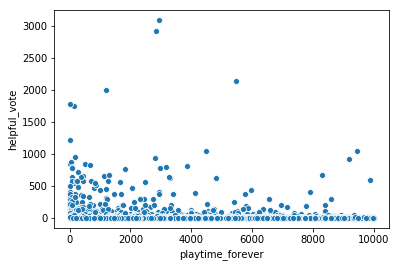

In [172]:
sns.scatterplot(x = 'playtime_forever', y = 'helpful_vote', data = df.loc[df['playtime_forever']<10000])

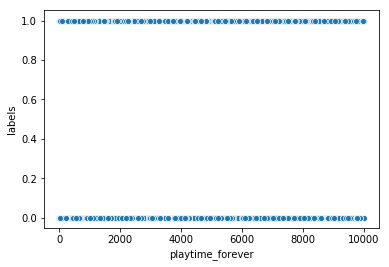

In [207]:
sns.scatterplot(x = 'playtime_forever', y = 'labels', data = df.loc[df['playtime_forever']<10000])

Conclusion: total playtime of a game does not affect whether or not a person's comment would stir interaction

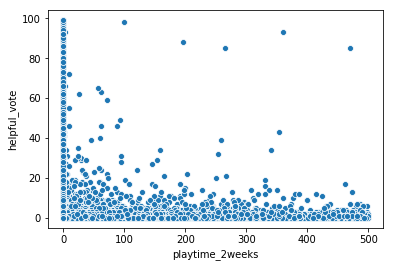

In [173]:
sns.scatterplot(x = 'playtime_2weeks', y = 'helpful_vote', data = df.loc[(df['playtime_2weeks']<500) & (df['helpful_vote']<100)])

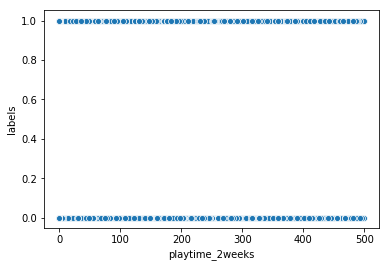

In [208]:
sns.scatterplot(x = 'playtime_2weeks', y = 'labels', data = df.loc[(df['playtime_2weeks']<500) & (df['helpful_vote']<100)])

Conclusion: Playtime in 2 weeks is too random as well. Playtime in general does not help with whether or not a comment is interacted 

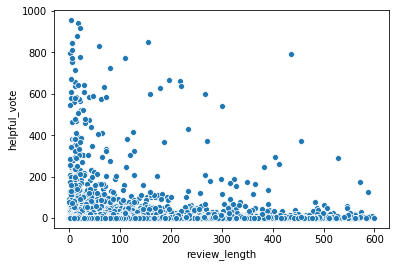

In [55]:
sns.scatterplot(x = 'review_length', y = 'helpful_vote', data = df.loc[(df['review_length']<600) & (df['helpful_vote']<1000)])

## Subset the dataframe to create feature space

Failure log: playtime does not correlate with interactive potential. Cannot use item_name since it is judging result with a hindsight. 

In [174]:
interesting_features = df.copy()[['review', 'playtime_2weeks', 'playtime_forever', 'item_name', 'labels', 'user_id', 'review_length', 'recommend']]

In [175]:
interesting_features.head()

,review,playtime_2weeks,playtime_forever,item_name,labels,user_id,review_length,recommend
0,simple yet with great replayability in my opin...,0,10006,Killing Floor,False,76561197970982479,45,1
1,its unique and worth a playthrough,0,271,Zeno Clash,False,76561197970982479,6,1
2,great atmosphere the gunplay can be a bit chun...,0,834,Metro 2033,False,76561197970982479,39,1
3,i know what you think when you see this title ...,0,84,Barbie™ Dreamhouse Party™,True,js41637,110,1
4,for a simple its actually not all that simple ...,0,551,Euro Truck Simulator 2,True,js41637,116,1


In [176]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
# interesting_features['playtime_2weeks'] = interesting_features['playtime_2weeks'].astype(int)
# interesting_features['playtime_forever'] = interesting_features['playtime_forever'].astype(int)

In [179]:
transformers = [('parse_review', TfidfVectorizer(), 'review'),
                ('parse_item_name', OneHotEncoder(handle_unknown='ignore'), ['user_id'])]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [180]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [181]:
X = interesting_features[['review', 'user_id', 'review_length', 'recommend']]
y = interesting_features['labels']

In [182]:
hold_X, test_X, hold_y, test_y = train_test_split(X, y, test_size = 0.2)

In [183]:
train_X, val_X, train_y, val_y = train_test_split(hold_X, hold_y, test_size = 0.2)

In [184]:
from sklearn.pipeline import Pipeline

In [185]:
pl = Pipeline([('transform', ct), ('model', LogisticRegressionCV(Cs = 1))])

In [186]:
pl.fit(train_X, train_y)

C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('parse_review', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8',...    random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

In [187]:
pl.score(val_X, val_y)

0.5334818321035779

In [188]:
pl.score(test_X, test_y)

0.544998886166184

In [130]:
pl2_train_performance = []
pl2_val_performance = []
pl2_test_performance = []

In [131]:
for i in range(-3, 2):
    c = 10**i
    print(c)
    pl2 = Pipeline([('transform', ct), ('model', LinearSVC(C = c))])
    pl2.fit(train_X, train_y)
    pl2_train_performance += [pl2.score(train_X, train_y)]
    pl2_val_performance += [pl2.score(val_X, val_y)]
    pl2_test_performance += [pl2.score(test_X, test_y)]

0.001


C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.01


C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1


C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1


C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10


C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [189]:
pl2_performance = pd.DataFrame([pl2_train_performance, pl2_val_performance, pl2_test_performance], 
                               columns = ['C=' + str(10**i) for i in range(-3, 2)], 
                               index = ['train', 'val', 'test']).T

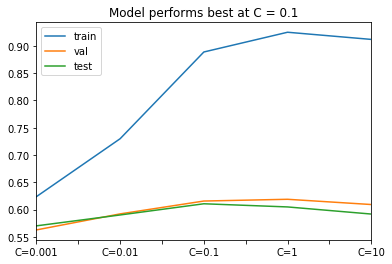

In [190]:
pl2_performance.plot(kind = 'line', title = 'Model performs best at C = 0.1')

In [202]:
pl2 = Pipeline([('transform', ct), ('model', LinearSVC(C = 0.1, max_iter = 500))])

In [203]:
pl2.fit(train_X, train_y)

C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('parse_review', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8',...max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [204]:
pl2.score(train_X, train_y)

0.8777541856660517

In [205]:
pl2.score(val_X, val_y)

0.6253654461923988

In [206]:
pl2.score(test_X, test_y)

0.6197371352194253

In [196]:
pl_svc = Pipeline([('transform', ct), ('model', SVC(degree=2))])

In [197]:
pl_svc.fit(train_X, train_y)

C:\Users\shuto\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('parse_review', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8',...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [198]:
pl_svc.score(test_X, test_y)

0.5247271107150813

In [199]:
performance = [[pl.score(train_X, train_y), pl.score(val_X, val_y), pl.score(test_X, test_y)],
 [pl2.score(train_X, train_y), pl2.score(val_X, val_y), pl2.score(test_X, test_y)],
 [pl_svc.score(train_X, train_y), pl_svc.score(val_X, val_y), pl_svc.score(test_X, test_y)]]

In [200]:
pd.DataFrame(performance, columns=['train', 'validation', 'test'], index=['logistic_regression', 'LinearSVC', 'Deg2_SVC'])

,train,validation,test
logistic_regression,0.547530,0.533482,0.544999
LinearSVC,0.887500,0.628289,0.620183
Deg2_SVC,0.524731,0.508144,0.524727
